
Imports



In [382]:
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt
import math

Load the Image




(1000, 1000, 3)


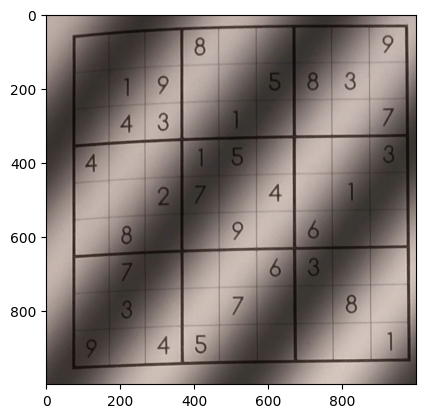

In [383]:
#Done: 1,2,4,6,7,9,11,14
#Failed:  8, 15, 16
#inverted: 3,5,10,12,13

imgGroup = [cv2.imread('Project Test Cases-20231212/01.jpg'),
       cv2.imread('Project Test Cases-20231212/02.jpg'),
       cv2.imread("Project Test Cases-20231212/03.jpg"),
       cv2.imread("Project Test Cases-20231212/04.jpg"),
       cv2.imread("Project Test Cases-20231212/05.jpg"),
       cv2.imread("Project Test Cases-20231212/06.jpg"),
       cv2.imread("Project Test Cases-20231212/07.jpg"),
       cv2.imread("Project Test Cases-20231212/08.jpg"),
       cv2.imread("Project Test Cases-20231212/09.jpg"),
       cv2.imread("Project Test Cases-20231212/10.jpg"),
       cv2.imread("Project Test Cases-20231212/11.jpg"),
       cv2.imread("Project Test Cases-20231212/12.jpg"),
       cv2.imread("Project Test Cases-20231212/13.jpg"),
       cv2.imread("Project Test Cases-20231212/14.jpg"),
       cv2.imread("Project Test Cases-20231212/15.jpg"),
       cv2.imread("Project Test Cases-20231212/16.jpg")]



# imgGroup = [cv2.imread('/content/01-Normal.jpg'),
#        cv2.imread('/content/02-TheMightyFinger.jpg'),
#        cv2.imread("/content/03-WhereBorder.jpg"),
#        cv2.imread("/content/04-CompressoEspresso.jpg"),
#        cv2.imread("/content/05-Ya3amSheel2elCoinYa3am.jpg"),
#        cv2.imread("/content/06-FarAndCurved.jpg"),
#        cv2.imread("/content/07-2elNoor2ata3.jpg"),
#        cv2.imread("/content/08-MeshShayef7agaYa3am.jpg"),
#        cv2.imread("/content/09-Normal2.jpg"),
#        cv2.imread("/content/10-Mal7wFelfel.jpg"),
#        cv2.imread("/content/11-FlashBang.jpg"),
#        cv2.imread("/content/12-BrokenPrinter.jpg"),
#        cv2.imread("/content/13-DarkMode.jpg"),
#        cv2.imread("/content/14-Sine.jpg"),
#        cv2.imread("/content/15-GoneWithTheWind.jpg"),
#        cv2.imread("/content/16-SomethingWentTerriblyWrongHere.jpg")]

number = 14
img = imgGroup[number-1].copy()

print(img.shape)
plt.imshow(img, cmap="gray")


Convert to Grayscale

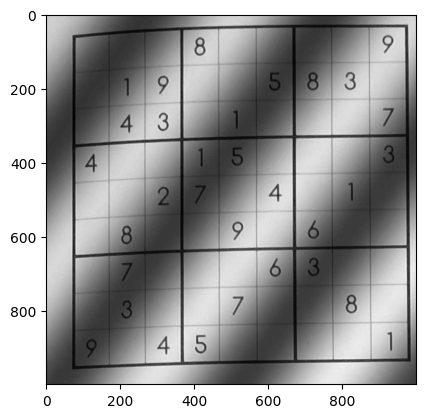

In [384]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# max = -1
# min = 999999
# for i in range(len(gray_image)):
#     for j in range(len(gray_image[0])):
#         if gray_image[i][j] > max:
#             max = gray_image[i][j]
#         if gray_image[i][j] < min:
#             min = gray_image[i][j]


# contrast_image = np.multiply(gray_image, 255/(max - min))

# for i in range(len(contrast_image)):
#     for j in range(len(contrast_image[0])):
#         if contrast_image[i][j] > max:
#             max = contrast_image[i][j]
#         if contrast_image[i][j] < min:
#             min = contrast_image[i][j]

# print(max)
# print(min)

# brightness_offset = 50  # You can adjust this value based on your needs
# brightened_image = cv2.add(gray_image, np.array(brightness_offset))


plt.imshow(gray_image  , cmap="gray")

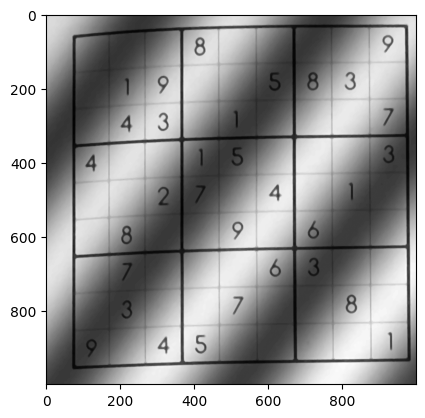

In [385]:
mean1 = cv2.medianBlur(gray_image.astype(np.uint8),5)
mean2 = cv2.medianBlur(mean1,5)
mean3 = cv2.medianBlur(mean2,5)
mean5 = cv2.medianBlur(mean3,3)
mean5 = (mean5 - mean5.min()) * (255/(mean5.max() - mean5.min()))
plt.imshow(mean5, cmap="gray")

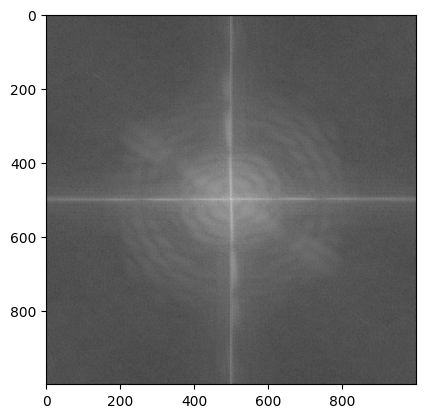

In [386]:
dft_img = np.fft.fft2(mean3)
dft_img_shift = np.fft.fftshift(dft_img)
plt.imshow(np.log(np.abs(dft_img_shift)), cmap = 'gray');

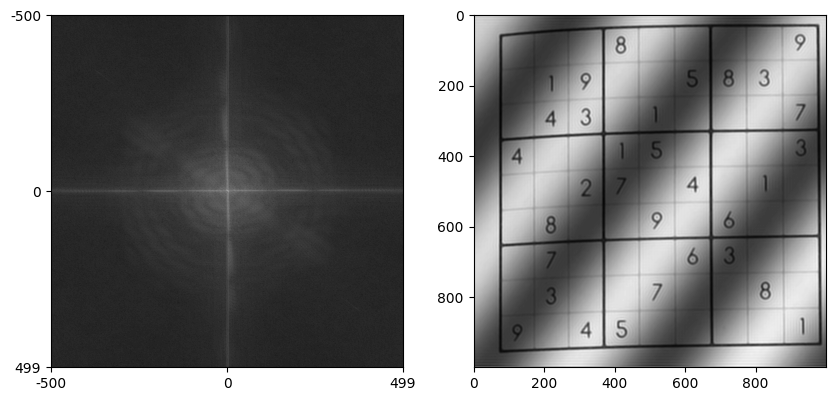

In [387]:
mask = np.zeros(dft_img.shape)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), 120, (255,255,255), -1).astype(np.uint8)
mask = cv2.GaussianBlur(mask, (21,21), 0)
dft_img_shifted = np.fft.fftshift(dft_img)
dft_img_shifted_lowpass = np.multiply(dft_img_shifted, mask)
img = np.fft.ifft2(np.fft.ifftshift(dft_img_shifted_lowpass))
fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)
ax1.set(yticks=[0, img.shape[0]//2, img.shape[0] - 1], yticklabels=[-img.shape[0]//2, 0, img.shape[0]//2 - 1]);
ax1.set(xticks=[0, img.shape[1]//2, img.shape[1] - 1], xticklabels=[-img.shape[1]//2, 0, img.shape[1]//2 - 1]);
ax1.imshow(np.abs(dft_img_shifted)**0.1, cmap = 'gray');
ax2.imshow(np.abs(img), cmap = 'gray')

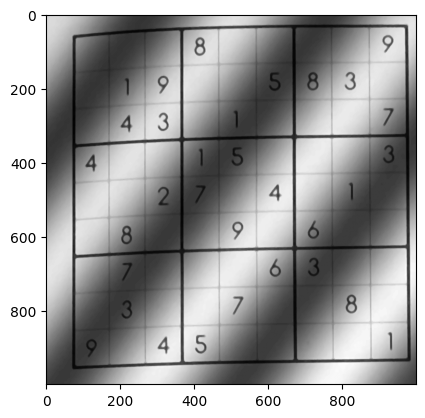

In [388]:
img1 = np.fft.ifft2(np.fft.ifftshift(dft_img))
img1 = np.abs(img1)

plt.imshow(img1, cmap="gray")

Adaptive Thresholding

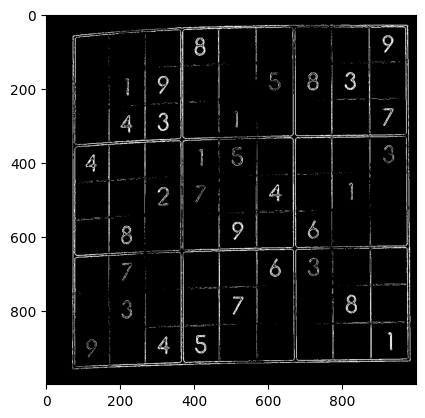

In [389]:

img_gray_threshed = cv2.adaptiveThreshold(src=img1.astype(np.uint8),
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=5,
    C=3
)

plt.imshow(img_gray_threshed, cmap="gray")

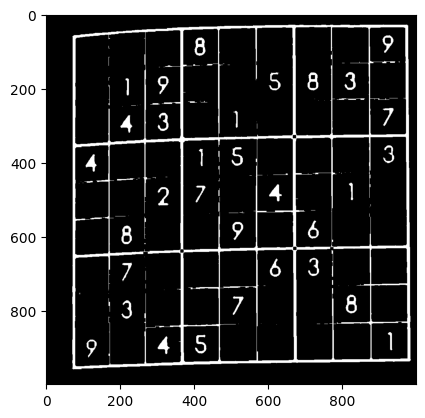

In [390]:
mean4 = cv2.medianBlur(img_gray_threshed,3)
closed_grid = np.zeros_like(mean4, dtype = np.uint8)
closed_grid = cv2.morphologyEx(img_gray_threshed, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9)))
plt.imshow(closed_grid, cmap="gray")

Get the largest object in the image using Cotours

It is assumed that the sudoku frame is the largest object in the image

In [391]:
# Fristdx = cv2.Sobel(closed_grid,cv2.CV_16S,1,0,None,5,1,5)
# firstdy = cv2.Sobel(closed_grid,cv2.CV_16S,0,1,None,5,1,5)
# firstcanny_img = cv2.Canny(Fristdx,firstdy,230,255,None,True)

# plt.imshow(firstcanny_img, cmap="gray")

[[[975  28]]

 [[ 71  60]]

 [[ 73 960]]

 [[985 935]]]
[71 60]
[975  28]
[ 73 960]
[985 935]


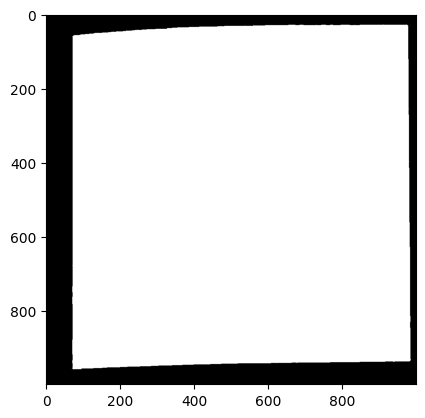

In [392]:
maxArea = -1
x = -1
contours, _ = cv2.findContours(closed_grid, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
selected_contours = []
sudoku_square = np.zeros(img_gray_threshed.shape, np.uint8)
for i in range(len(contours)):
  area = cv2.contourArea(contours[i])
  if area > maxArea:
     maxArea = area
     x = i


peri = cv2.arcLength(contours[x],True)
corners = cv2.approxPolyDP(contours[x],0.06*peri,True)



selected_contours.append(contours[x])
cv2.fillPoly(sudoku_square, pts=selected_contours, color= (255,255,255))
print(corners)

#######
min1 = 999999
min1Index = -1
for i in range(4):
  if corners[i][0][1] < min1:
    min1 = corners[i][0][1]
    min1Index = i

min2 = 999999
min2Index = -1
for i in range(4):
  if i == min1Index:
    continue
  if corners[i][0][1] < min2:
    min2 = corners[i][0][1]
    min2Index = i

# print(corners[min1Index][0])
# print(corners[min2Index][0])

c1 = 0
c2 = 0

if corners[min1Index][0][0] < corners[min2Index][0][0]:
  c1 =  corners[min1Index][0]
  c2 = corners[min2Index][0]
else:
  c2 =  corners[min1Index][0]
  c1 = corners[min2Index][0]

# # print(c1)
# # print(c2)

# min1X = 999999
# min1XIndex = -1
# for i in range(4):
#   if corners[i][0][0] < min1X:
#     min1X = corners[i][0][0]
#     min1XIndex = i

# min2X = 999999
# min2XIndex = -1
# for i in range(4):
#   if i == min1XIndex:
#     continue
#   if corners[i][0][0] < min2X:
#     min2X = corners[i][0][0]
#     min2XIndex = i

i1 = -1
i2 = -1
for i in range(4):
  if i != min1Index and i!= min2Index:
    i1 = i


for i in range(4):
  if i != min1Index and i!= min2Index and i != i1:
    i2 = i

c3 = 0
c4 = 0

if corners[i1][0][1] < corners[i2][0][1]:
  c4 =  corners[i1][0]
  c3 = corners[i2][0]
else:
  c3 =  corners[i1][0]
  c4 = corners[i2][0]


print(c1)
print(c2)
print(c3)
print(c4)

######

plt.imshow(sudoku_square, cmap="gray")

Extract Edges using Canny

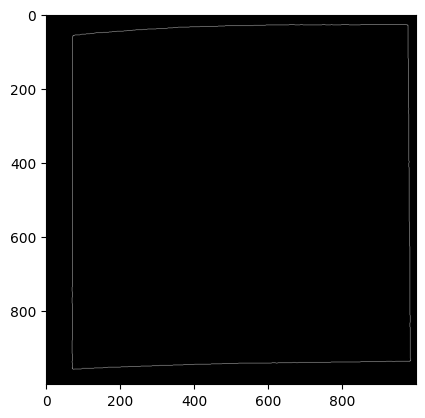

In [393]:
dx = cv2.Sobel(sudoku_square,cv2.CV_16S,1,0,None,5,1,5)
dy = cv2.Sobel(sudoku_square,cv2.CV_16S,0,1,None,5,1,5)
canny_img = cv2.Canny(dx,dy,230,255,None,True)

plt.imshow(canny_img, cmap="gray")

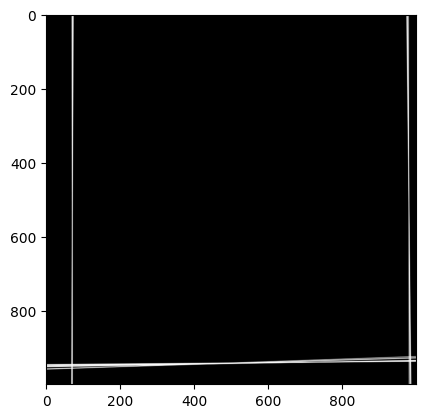

In [394]:

# newimg = cv2.Canny(canny_img, 50, 150)

hough_lines = cv2.HoughLines(
    image=canny_img,
    rho=1,  # Distance resolution of the accumulator in pixels.
    theta=0.00120,  # Angle resolution of the accumulator in radians.
    threshold=250,  # Voting threshold for accumulator.
    lines=None,
    min_theta=0,  # Minimum angle to check for lines in radians.
    max_theta=math.pi  # Maximum angle to check for lines in radians.
)


tmp_imgy = np.zeros_like(img_gray_threshed, dtype = np.uint8)
for rho, theta in hough_lines[:,0]:
    # Mapping from polar (rho, theta) to cartesian (x0, y0)
    x0 = math.cos(theta) * rho
    y0 = math.sin(theta) * rho
    # Create an extension to the points
    pt1 = (int(x0 + 2000*(-math.sin(theta))), int(y0 + 2000*(math.cos(theta))))
    pt2 = (int(x0 - 2000*(-math.sin(theta))), int(y0 - 2000*(math.cos(theta))))
    cv2.line(tmp_imgy, pt1, pt2, (255,0,0), 1, cv2.LINE_AA)


# tmp_imgy = cv2.erode(tmp_imgy,cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)))
plt.imshow(tmp_imgy, cmap='gray')




Get the corners using Harris

In [395]:
# dest = cv2.cornerHarris(tmp_imgy, 7, 3, 0.04)

# plt.imshow(dest, cmap="gray")

Apply a Gaussian Filter, get the absolute values, then Threshhold to only get the corner points

In [396]:
# ret, thresh1 = cv2.threshold(dest, 0, 255, cv2.THRESH_BINARY)

# dest = thresh1.copy()
# dest = cv2.erode(thresh1,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)))


# plt.imshow(dest, cmap="gray")

Get the coordinates of the Corners

In [397]:
# center_point = (dest.shape[0] // 2, dest.shape[1] // 2)

# left_part = dest[:, :center_point[1]]

# right_part = dest[:, center_point[1]:]


# top_left_part = left_part[:center_point[0], :]
# bottom_left_part = left_part[center_point[0]:, :]

# top_right_part = right_part[:center_point[0], :]
# bottom_right_part = right_part[center_point[0]:, :]

# c1 = (-1, -1)
# found = False
# for i in range(len(top_left_part)):
#     for j in range(len(top_left_part[0])):
#         if top_left_part[i][j] > 0:
#             c1 = (i+10, j+10)
#             found = True
#             break
#     if found:
#         break

# print(c1)

# c2 = (-1, -1)
# found = False
# for i in range(len(top_right_part)):
#     for j in range(len(top_right_part[0])):
#         if top_right_part[i][j] > 0:
#             c2 = (i+10, j + center_point[1]+10)
#             found = True
#             break
#     if found:
#         break

# print(c2)

# c3 = (-1, -1)
# found = False
# for i in range(len(bottom_left_part)):
#     for j in range(len(bottom_left_part[0])):
#         if bottom_left_part[i][j] > 0:
#             c3 = (i + center_point[0]+10, j+10)
#             found = True
#             break
#     if found:
#         break

# print(c3)

# c4 = (-1, -1)
# found = False
# for i in range(len(bottom_right_part)):
#     for j in range(len(bottom_right_part[0])):
#         if bottom_right_part[i][j] > 0:
#             c4 = (i + center_point[0]+10, j + center_point[1]+10)
#             found = True
#             break
#     if found:
#         break

# print(c4)

Perspective Transform

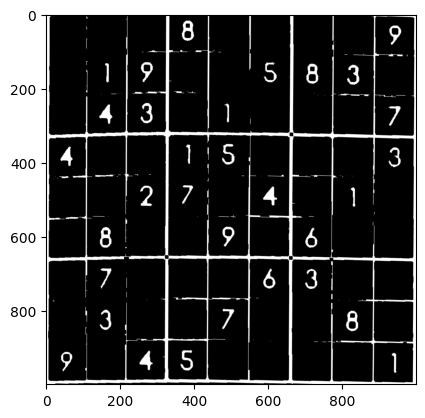

In [398]:
input_points = np.float32([corners[1][::-1],corners[0][::-1], corners[2][::-1], corners[3][::-1]])
width = img.shape[1]
height = img.shape[0]

converted_points = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
matrix = cv2.getPerspectiveTransform(input_points, converted_points)
img_output = cv2.warpPerspective(closed_grid, matrix, (width, height))
plt.imshow(img_output, cmap="gray")


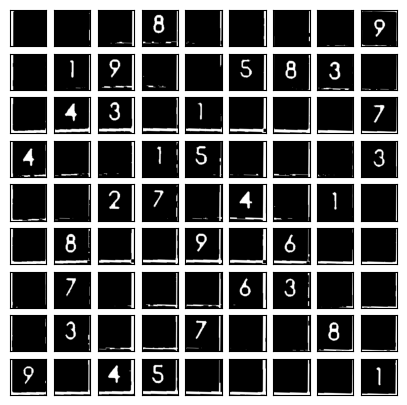

In [399]:
M = img_output.shape[0] // 9
N = img_output.shape[1] // 9
number_tiles = []
for i in range(9):
    number_tiles.append([])
    for j in range(9):
        tile = img_output[i*M:(i+1)*M, j*N:(j+1)*N]
        number_tiles[i].append(tile)

_, axes = plt.subplots(9, 9, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(number_tiles[i][j], cmap="gray");
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)

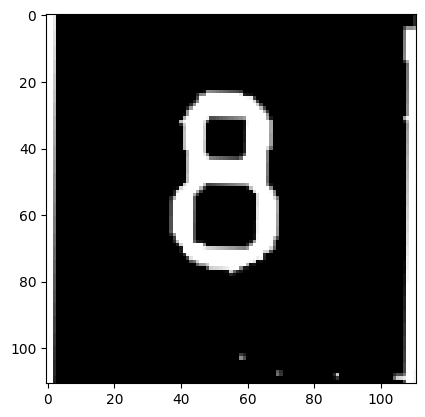

In [400]:
plt.imshow(number_tiles[1][6], cmap='gray')

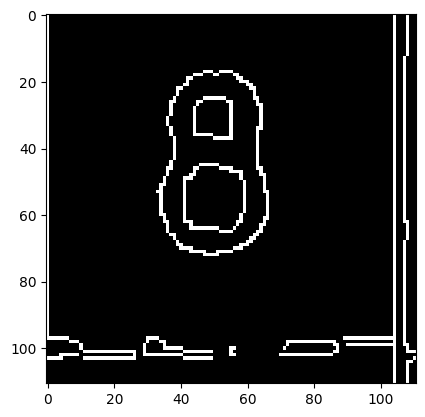

In [401]:
number_tiles[0][3] = cv2.Canny(number_tiles[0][3], 50, 150)
plt.imshow(number_tiles[0][3], cmap='gray')

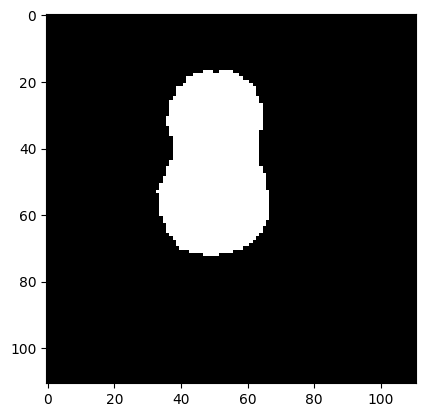

In [402]:
max = -1
x = -1

contours, _ = cv2.findContours(number_tiles[0][3], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
selected_contours = []
num = np.zeros(number_tiles[3][0].shape, np.uint8)
for i in range(len(contours)):
  area = cv2.contourArea(contours[i])
  if area > max:
     max = area
     x = i

selected_contours.append(contours[x])
cv2.fillPoly(num, pts=selected_contours, color= (255,255,255))
plt.imshow(num, cmap="gray")

In [403]:
num = num & number_tiles[0][3]

cv2.imwrite('Number1', num)
plt.imshow(num, cmap='gray')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3209770380.py, line 3)

(111, 111)


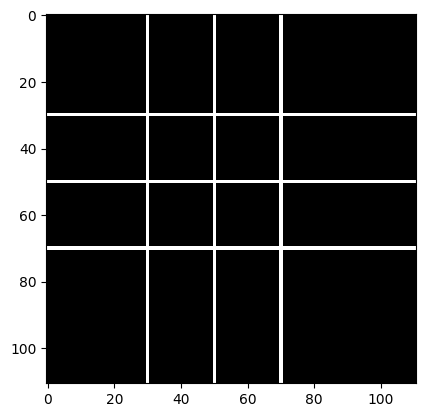

In [ ]:
img_dimensions = num.shape
print(img_dimensions)

new_img = np.zeros_like(number_tiles[0][0], dtype = np.uint8)
#draw horizontal lines
image = cv2.line(new_img, (0, 30), (111, 30), (255, 255, 255), 1)
image = cv2.line(new_img, (0, 50), (111, 50), (255, 255, 255), 1)
image = cv2.line(new_img, (0, 70), (111, 70), (255, 255, 255), 1)

#draw vertical lines
image = cv2.line(new_img, (30, 0), (30, 111), (255, 255, 255), 1)
image = cv2.line(new_img, (50, 0), (50, 111), (255, 255, 255), 1)
image = cv2.line(new_img, (70, 0), (70, 111), (255, 255, 255), 1)

plt.imshow(image, cmap = "gray")


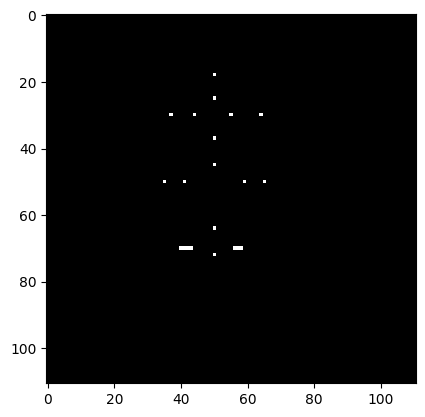

In [ ]:
out = image & num
plt.imshow(out, cmap='gray') 